# 图像上的算术运算
## 目标
- 学习图像上的算术运算，加法，减法，位运算(bitwise operation)等。
- 我们将要学习的函数与有： cv2.add()， cv2.addWeighted() 等。

## 7.1 图像加法
你可以使用函数 cv2.add() 将两幅图像进行加法运算，当然也可以直接使
用 numpy， res=img1+img。两幅图像的大小，类型必须一致，或者第二个
图像可以使一个简单的标量值。
<table><tr><td bgcolor=green><p algin=left>
注意： OpenCV 中的加法与 Numpy 的加法是有所不同的。 OpenCV 的加法
是一种饱和操作，而 Numpy 的加法是一种模操作。</p></td></tr></table>

例如下面两个例子：


In [2]:
import numpy as np
import cv2
x = np.uint8([250])
y = np.uint8([10])
print(cv2.add(x,y))# 250+10 = 260 => 255
print(x+y) # 250+10 = 260 % 256 = 4

[[255]]
[4]


<font align="left" color=blue size=3>无符号整数溢出:</font>  
unit8：8位二进制，取值范围[0-255]  
溢出的话就对2的8 次方取余  
如果是unit32，就是对2的32次方取余  

使用图片，两种方法会产生截然不同的效果

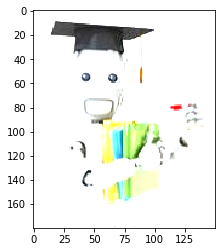

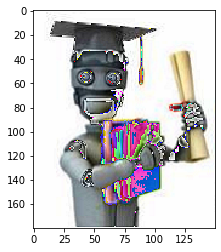

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
img1 = cv2.imread('opencv_logo.png',0)  #灰色图像
img2 = cv2.imread('ml.png',1)  # 彩色图像
#img3 = cv2.add(img1,img2) ## 这一行会报错，因为形状不同
img3 = cv2.add(img2,img2)
imgeRGB = cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)
plt.imshow(imgeRGB)
plt.show()

img3 = img2+img2   # 溢出 （物极必反）
imgeRGB = cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)
plt.imshow(imgeRGB)
plt.show()

用灰色图像尝试一下

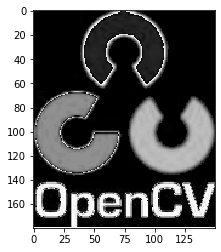

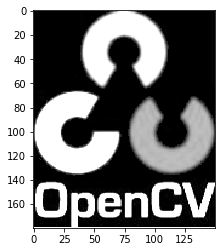

In [5]:
img3 = img1+img1
imgeRGB = cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)

img3_add = cv2.add(img1,img1)
imgeRGB_add = cv2.cvtColor(img3_add,cv2.COLOR_BGR2RGB)

plt.imshow(imgeRGB)
plt.show()

plt.imshow(imgeRGB_add)
plt.show()

这种差别在你对两幅图像进行加法时会更加明显。 OpenCV 的结果会更好
一点。所以我们尽量使用 OpenCV 中的函数。

## 7.2 图像混合(Image Blending)
这其实也是加法，但是不同的是两幅图像的权重不同，这就会给人一种混
合或者透明的感觉。图像混合的计算公式如下：
$$g (x) = (1 − \alpha) f_0(x) + (\alpha)f_1 (x)$$
通过修改 α 的值（ 0 →1），可以实现非常酷的混合。
现在我们把两幅图混合在一起。第一幅图的权重是 0.7，第二幅图的权重
是 0.3。函数 cv2.addWeighted() 可以按下面的公式对图片进行混合操作。
$$dst = (\alpha) · img1 + \beta · img2 + \gamma$$
这里 $\gamma$ 的取值为 0。

<function matplotlib.pyplot.show(*args, **kw)>

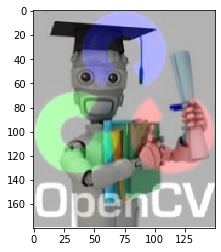

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img1=cv2.imread('ml.png')
img2=cv2.imread('opencv_logo.png')
dst=cv2.addWeighted(img1,0.7,img2,0.3,0)  # 图片的大小要相等 
plt.imshow(dst)
plt.show

# 7.3 按位运算（bitwise Opertions）
这里包括的按位操作有： AND， OR， NOT， XOR 等。当我们提取图像的
一部分，选择非矩形 ROI(region of interest)时这些操作会很有用（下一章你就会明白）。下面的
例子就是教给我们如何改变一幅图的特定区域。  
我想把 OpenCV 的标志放到另一幅图像上。如果我使用加法，颜色会改
变，如果使用混合，会得到透明效果，但是我不想要透明。如果他是矩形我可
以象上一章那样使用 ROI。但是他不是矩形。但是我们可以通过下面的按位运
算实现：

In [7]:
import cv2
import numpy as np
# 加载图像
img1 = cv2.imread('roi.png')
img2 = cv2.imread('opencv_logo.png')
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 175, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
# Now black-out the area of logo in ROI
# 取 roi 中与 mask 中不为零的值对应的像素的值，其他值为 0
# 注意这里必须有 mask=mask 或者 mask=mask_inv, 其中的 mask= 不能忽略
img1_bg = cv2.bitwise_and(roi,roi,mask = mask)
# 取 roi 中与 mask_inv 中不为零的值对应的像素的值，其他值为 0。
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask_inv)
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

## <font color=blue>按位运算实现抠图</font>

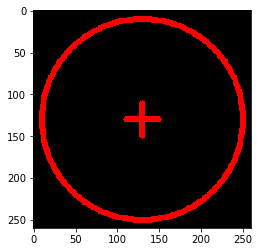

In [8]:
img1 = cv2.imread("messi5.jpg")  #稻草人
img2 = np.zeros((260,260,3),np.uint8)  # 圆圈
cv2.circle(img2,(130,130),120,(0,0,255),5)
cv2.line(img2,(110,130),(150,130),(0,0,255),5)
cv2.line(img2,(130,110),(130,150),(0,0,255),5)

# 用matplotlib 显示roi
imageRGB = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()

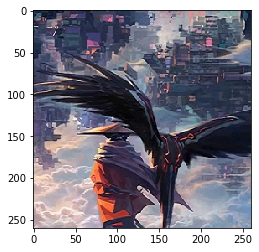

In [9]:
# img1 处理的区域roi
roi = img1[(200-130):(200+130),(200-130):(200+130)] 
imageRGB = cv2.cvtColor(roi,cv2.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()

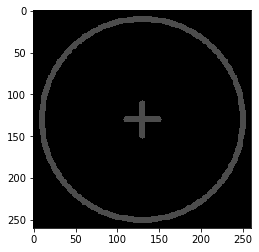

76


In [10]:
# img2 灰度图像
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
# 显示
imageRGB = cv2.cvtColor(img2gray, cv2.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()
print(img2gray[130,130]) # 观察红色坐标点，现在变为灰色

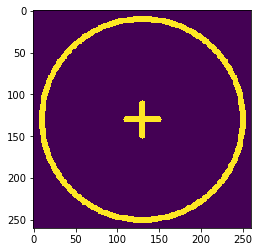

0
255


In [11]:
ret,mask = cv2.threshold(img2gray,10,255,cv2.THRESH_BINARY)
plt.imshow(mask)
plt.show()
print(mask[0,0]) # 观察背景颜色，为黑色
print(mask[130,130]) # 观察红色点 坐标，现在变为白色

<font color=blue>按位反转:bitwise_not</font>

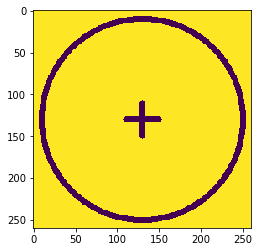

255
0


In [12]:
# 反色
mask_inv = cv2.bitwise_not(mask)
plt.imshow(mask_inv)
plt.show()
print(mask_inv[0,0])
print(mask_inv[130,130])

<font color=blue>按位与:cv2.bitwise_and</font>  
dst = cv2.bitwise_and(src1,src2[,dst[mask]])

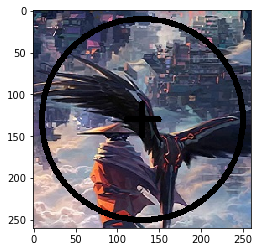

[88 57 48]
[0 0 0]


In [13]:
# 把圈的位置抠出来
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
imageRGB = cv2.cvtColor(img1_bg,cv2.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()
print(img1_bg[0,0]) # 观察背景
print(img1_bg[130,130]) # mask的部分，时黑色


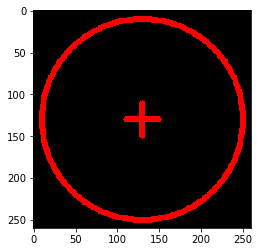

[0 0 0]
[  0   0 255]


In [14]:
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
# img2_fg = cv2.biwise_and(img2,mask = img2gray)
imageRGB = cv2.cvtColor(img2_fg,cv2.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()
print(img2_fg[0,0]) # 观察背景，是黑色
print(img2_fg[130,130])# mask的部分

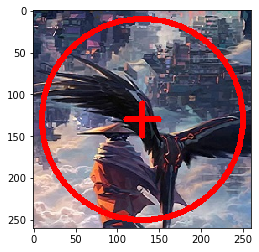

In [15]:
dst = cv2.add(img1_bg,img2_fg)
imageRGB = cv2.cvtColor(dst,cv2.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()

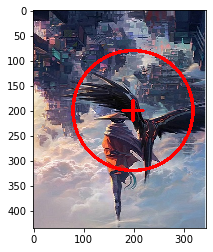

In [16]:
img1[(200-130):(200+130),(200-130):(200+130)]  = dst
imageRGB = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()

## <font color=blue>逐位运算bitwise原理</font> 
### 目标
- 了解bitwise operation的原理
- 主要函数;bitwise_and, bitwise_or, bitwise_not, bitwise_xor, cv2.threshold

###  按位与:bitwise_and
函数：dst = cv2.bitwise_and(src1,src2[,dst[msk]])  
参数：  
src1:输入数组1  
src2:输入数组2  
dst:输出数组，与输入数组的形状和类型相同  
mask:可选 参数，8位单通道数组，用于指定要更改的元素位置


<table align="left"><tr ><td bgcolor=#FFA07A><p align="left">
注： <br />
    src:source,源的意思，即输入的数组，或者说来源图像    <br/>
    dst:destination,目标，即目标图像，也就是函数输出图像 <br />
    mask:面具的意思，想象我们抠出一部分图像，是不是跟面具一个意思 <br />
   </p> </td></tr></table>

In [17]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

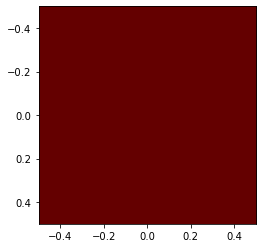

In [18]:
img1 = np.zeros((1,1,3),np.uint8) 
img1[:] = [0,0,100]
imageRGB = cv2.cvtColor(img1,cv2.COLOR_RGB2BGR)
plt.imshow(imageRGB)
plt.show()

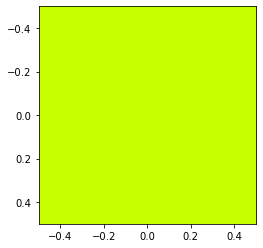

In [19]:
img2 = np.zeros((1,1,3),np.uint8) 
img2[:] = [0,255,200]
imageRGB = cv2.cvtColor(img2,cv2.COLOR_RGB2BGR)
plt.imshow(imageRGB)
plt.show()

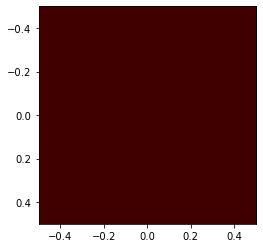

In [20]:
dst = cv2.bitwise_and(img1,img2)
imageRGB = cv2.cvtColor(dst,cv2.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()

In [21]:
bin(100)

'0b1100100'

In [22]:
bin(200)

'0b11001000'

In [23]:
100&200

64

# <font color=blue>按位反转:bitwise_not()</font>
函数：  
dst = cv2.bitwise_not(src[,dst[,mask]])  
参数  
src:输入数组  
dst:输出数组，与输入数组形状和类型相同  
mask:可选参数，8位单通道数组，用于指定要更改的元素位置  

<font color=blue>逻辑运算:bitwise_not()</font>  
二进制逐位反转，（the bits of x inverted）
将二进制数+1之后乘以-1

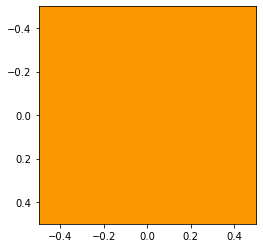

In [24]:
img1 = np.zeros((1,1,3),np.uint8)
img1[:] = [0,150,250]
imageRGB = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()

In [25]:
print(img1)

[[[  0 150 250]]]


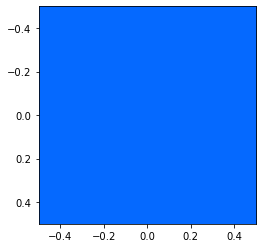

In [26]:
dst = cv2.bitwise_not(img1)
imageRGB = cv2.cvtColor(dst,cv2.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()

In [27]:
print(dst)

[[[255 105   5]]]


In [28]:
print(dst+img1)

[[[255 255 255]]]


In [29]:
bin(200)

'0b11001000'

In [30]:
np.array([~0],np.uint8)

array([255], dtype=uint8)

In [31]:
np.array([~150],np.uint8)

array([105], dtype=uint8)

# <font color=blue>按位或:bitwise_or()</font>
函数：  
dst = cv2.bitwise_or(src1，src2[,dst[,mask]])  
参数  
src1:输入数组1    
src2:输入数组2  
dst:输出数组，与输入数组形状和类型相同  
mask:可选参数，8位单通道数组，用于指定要更改的元素位置  

<font color=blue>逻辑运算:bitwise_or()</font>  
或：有1就是1

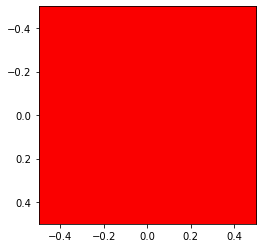

In [32]:
img1 = np.zeros((1,1,3),np.uint8)
img1[:] = [0,0,250]
imageRGB = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()

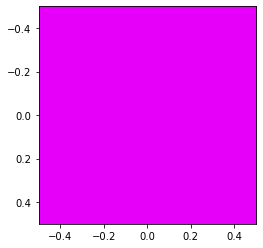

In [33]:
img1 = np.zeros((1,1,3),np.uint8)
img1[:] = [250,0,230]
imageRGB = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()

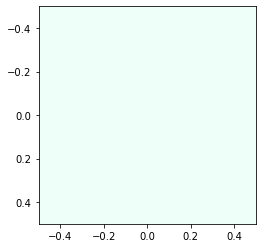

In [34]:
dst = cv2.bitwise_or(img1,img2)
imageRGB = cv2.cvtColor(dst,cv2.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()

In [35]:
print(img1)
print(img2)
print(dst)

[[[250   0 230]]]
[[[  0 255 200]]]
[[[250 255 238]]]


In [36]:
bin(230)

'0b11100110'

In [37]:
bin(200)

'0b11001000'

In [38]:
bin(230|200)

'0b11101110'

In [39]:
230|200

238

# <font color=blue>按位异或bitwise_xor()</font>
函数：  
dst = cv2.bitwise_xor(src1，src2[,dst[,mask]])  
参数  
src1:输入数组1    
src2:输入数组2  
dst:输出数组，与输入数组形状和类型相同  
mask:可选参数，8位单通道数组，用于指定要更改的元素位置  

<font color=blue>逻辑运算:bitwise_xor()</font>  
相当于对位相加（不进位），不同的时候位1，相同的时候为0

In [40]:
print(bin(5))
print(bin(3))
print(bin(5^3))

0b101
0b11
0b110


In [41]:
np.array([100^200],np.uint8)

array([172], dtype=uint8)

<font color=blue>cv2.threshold</font>

对数组的每一个元素都设置阈值    
retval,dst = cv2.threshold(src,thresh,maxval,type[,dst])  
src:要处理的图片  
thresh:threshold阈值  
maxval:比阈值大赋值为maxval  
type:类型  

In [42]:
img1 = np.zeros((10,10),np.uint8)
img1[(0):(5),(0):(5)] = (5)
img1[(0):(5),(5):(10)] = (50)
img1[(5):(10),(0):(10)] = (100)
img1[(5):(10),(5):(10)] = (250)
print(img1)

[[  5   5   5   5   5  50  50  50  50  50]
 [  5   5   5   5   5  50  50  50  50  50]
 [  5   5   5   5   5  50  50  50  50  50]
 [  5   5   5   5   5  50  50  50  50  50]
 [  5   5   5   5   5  50  50  50  50  50]
 [100 100 100 100 100 250 250 250 250 250]
 [100 100 100 100 100 250 250 250 250 250]
 [100 100 100 100 100 250 250 250 250 250]
 [100 100 100 100 100 250 250 250 250 250]
 [100 100 100 100 100 250 250 250 250 250]]


In [43]:
ret,mask = cv2.threshold(img1,20,200,cv2.THRESH_BINARY)

In [44]:
print(ret)

20.0


In [45]:
print(mask)

[[  0   0   0   0   0 200 200 200 200 200]
 [  0   0   0   0   0 200 200 200 200 200]
 [  0   0   0   0   0 200 200 200 200 200]
 [  0   0   0   0   0 200 200 200 200 200]
 [  0   0   0   0   0 200 200 200 200 200]
 [200 200 200 200 200 200 200 200 200 200]
 [200 200 200 200 200 200 200 200 200 200]
 [200 200 200 200 200 200 200 200 200 200]
 [200 200 200 200 200 200 200 200 200 200]
 [200 200 200 200 200 200 200 200 200 200]]


可见大于20的都变成了200